In [104]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow
import missingno as msno
import os

import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Modling:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Model Evaluation:
from sklearn.metrics import silhouette_score

# IN CASE you don't have pyarrow  and plotlyinstalled, run the following command in your terminal
# pip install pyarrow 
# pip install plotly

In [105]:
# save image
PROJECT_ROOT_DIR = "/Users/petrick/Desktop/Fintech540-Group_projet/"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# read in the data
df = pd.read_parquet('daily_20221004.parquet.gzip')

### EDA

In [3]:
len(df.columns)

12

In [4]:
# check the data
df.sample(10)

,,time_open,time_high,time_low,quote.USD.open,quote.USD.high,quote.USD.low,quote.USD.close,quote.USD.volume,quote.USD.market_cap,quote.USD.timestamp,symbol,id
symbol_id,time_close,,,,,,,,,,,,
XDB_4566,2020-05-19T00:59:59.999Z,2020-05-19T00:00:00.000Z,2020-05-19T00:08:12.000Z,2020-05-19T00:59:15.000Z,0.018211,0.018585,0.018076,0.018076,NaN,6.138969e+06,2020-05-19T00:59:59.999Z,XDB,4566
PBR_8320,2021-02-21T00:59:59.999Z,2021-02-21T00:00:00.000Z,2021-02-21T00:56:03.000Z,2021-02-21T00:14:03.000Z,0.335112,0.340686,0.332048,0.340598,1.111736e+06,1.021795e+07,2021-02-21T00:59:59.999Z,PBR,8320
DMCH_5622,2020-07-10T00:59:59.999Z,2020-07-10T00:00:00.000Z,2020-07-10T00:55:17.000Z,2020-07-10T00:02:27.000Z,0.205632,0.220553,0.205297,0.218877,NaN,0.000000e+00,2020-07-10T00:59:59.999Z,DMCH,5622
MARO_3175,2019-12-16T00:59:59.999Z,2019-12-16T00:00:00.000Z,2019-12-16T00:11:05.000Z,2019-12-16T00:58:13.000Z,0.024691,0.025668,0.024415,0.024415,NaN,9.236751e+06,2019-12-16T00:59:59.999Z,MARO,3175
TRAC_2467,2018-11-12T00:59:59.999Z,2018-11-12T00:00:00.000Z,2018-11-12T00:22:14.000Z,2018-11-12T00:49:15.000Z,0.037634,0.037917,0.037219,0.037241,NaN,1.035078e+07,2018-11-12T00:59:59.999Z,TRAC,2467
MATIC_3890,2022-05-09T00:59:59.999Z,2022-05-09T00:00:00.000Z,2022-05-09T00:47:00.000Z,2022-05-09T00:00:00.000Z,0.974406,0.990015,0.974406,0.988411,5.662564e+08,7.757906e+09,2022-05-09T00:59:59.999Z,MATIC,3890
DOGE_74,2021-10-20T00:59:59.999Z,2021-10-20T00:00:00.000Z,2021-10-20T00:00:03.000Z,2021-10-20T00:43:03.000Z,0.245502,0.245502,0.243161,0.243722,1.586536e+09,3.211292e+10,2021-10-20T00:59:59.999Z,DOGE,74
SCC_3986,2020-07-10T00:59:59.999Z,2020-07-10T00:00:00.000Z,2020-07-10T00:00:22.000Z,2020-07-10T00:11:16.000Z,0.734247,0.734247,0.732420,0.732825,NaN,5.020380e+06,2020-07-10T00:59:59.999Z,SCC,3986
STRX_9220,2021-08-04T00:59:59.999Z,2021-08-04T00:00:00.000Z,2021-08-04T00:00:56.000Z,2021-08-04T00:28:58.000Z,0.007926,0.007926,0.007873,0.007895,2.186988e+04,0.000000e+00,2021-08-04T00:59:59.999Z,STRX,9220


In [5]:
# Check column names
print(df.columns)
print('There are {} columns in the dataset'.format(len(df.columns)))

Index(['time_open', 'time_high', 'time_low', 'quote.USD.open',
       'quote.USD.high', 'quote.USD.low', 'quote.USD.close',
       'quote.USD.volume', 'quote.USD.market_cap', 'quote.USD.timestamp',
       'symbol', 'id'],
      dtype='object')
There are 12 columns in the dataset


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1243591 entries, ('MPH_7742', '2020-11-23T00:59:59.999Z') to ('CXO_2490', '2022-07-05T00:59:59.999Z')
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   time_open             1243591 non-null  object 
 1   time_high             1243071 non-null  object 
 2   time_low              1243071 non-null  object 
 3   quote.USD.open        1243591 non-null  float64
 4   quote.USD.high        1243591 non-null  float64
 5   quote.USD.low         1243591 non-null  float64
 6   quote.USD.close       1243591 non-null  float64
 7   quote.USD.volume      742019 non-null   float64
 8   quote.USD.market_cap  1243591 non-null  float64
 9   quote.USD.timestamp   1243591 non-null  object 
 10  symbol                1243591 non-null  object 
 11  id                    1243591 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 118.8+ MB


In [8]:
# Since (symbol + id) is the unique identifier:
df['uid'] = df['symbol'] + '_'+ df['id'].astype(str)

In [11]:
# Take a peep:
df.sample(20)

,,time_open,time_high,time_low,quote.USD.open,quote.USD.high,quote.USD.low,quote.USD.close,quote.USD.volume,quote.USD.market_cap,quote.USD.timestamp,symbol,id,uid
symbol_id,time_close,,,,,,,,,,,,,
MBL_4038,2020-07-04T00:59:59.999Z,2020-07-04T00:00:00.000Z,2020-07-04T00:59:20.000Z,2020-07-04T00:33:20.000Z,0.001841,0.001863,0.001836,0.001863,NaN,1.529444e+07,2020-07-04T00:59:59.999Z,MBL,4038,MBL_4038
BTM_1866,2018-04-30T00:59:59.999Z,2018-04-30T00:00:00.000Z,2018-04-30T00:14:15.000Z,2018-04-30T00:34:16.000Z,1.073610,1.106200,1.063960,1.076010,NaN,1.062022e+09,2018-04-30T00:59:59.999Z,BTM,1866,BTM_1866
GTC_10052,2021-10-05T00:59:59.999Z,2021-10-05T00:00:00.000Z,2021-10-05T00:49:09.000Z,2021-10-05T00:33:15.000Z,8.039303,8.048498,7.933744,8.047330,1.597622e+07,1.142576e+08,2021-10-05T00:59:59.999Z,GTC,10052,GTC_10052
CARBON_502,2016-04-21T00:59:59.999Z,2016-04-21T00:00:00.000Z,2016-04-21T00:09:13.000Z,2016-04-21T00:44:12.000Z,0.000004,0.000004,0.000004,0.000004,NaN,6.788623e+04,2016-04-21T00:59:59.999Z,CARBON,502,CARBON_502
XNO_1567,2021-12-02T00:59:59.999Z,2021-12-02T00:00:00.000Z,2021-12-02T00:32:38.000Z,2021-12-02T00:52:33.000Z,5.003190,5.004272,4.997640,5.000761,NaN,6.663428e+08,2021-12-02T00:59:59.999Z,XNO,1567,XNO_1567
LYXe_5625,2021-11-02T00:59:59.999Z,2021-11-02T00:00:00.000Z,2021-11-02T00:06:06.000Z,2021-11-02T00:58:06.000Z,37.189603,37.189671,36.467851,36.858281,7.965079e+06,5.545666e+08,2021-11-02T00:59:59.999Z,LYXe,5625,LYXe_5625
NOIA_4191,2020-01-21T00:59:59.999Z,2020-01-21T00:00:00.000Z,2020-01-21T00:22:14.000Z,2020-01-21T00:47:04.000Z,0.003665,0.003681,0.003653,0.003655,NaN,5.794896e+05,2020-01-21T00:59:59.999Z,NOIA,4191,NOIA_4191
DMD_77,2014-06-09T00:59:59.999Z,2014-06-09T00:00:00.000Z,2014-06-09T00:42:44.000Z,2014-06-09T00:32:37.000Z,0.242593,0.262282,0.242368,0.248966,NaN,9.199203e+04,2014-06-09T00:59:59.999Z,DMD,77,DMD_77
MTL_1788,2021-06-07T00:59:59.999Z,2021-06-07T00:00:00.000Z,2021-06-07T00:49:08.000Z,2021-06-07T00:00:16.000Z,2.456155,2.704900,2.456155,2.648309,9.964031e+07,1.736995e+08,2021-06-07T00:59:59.999Z,MTL,1788,MTL_1788


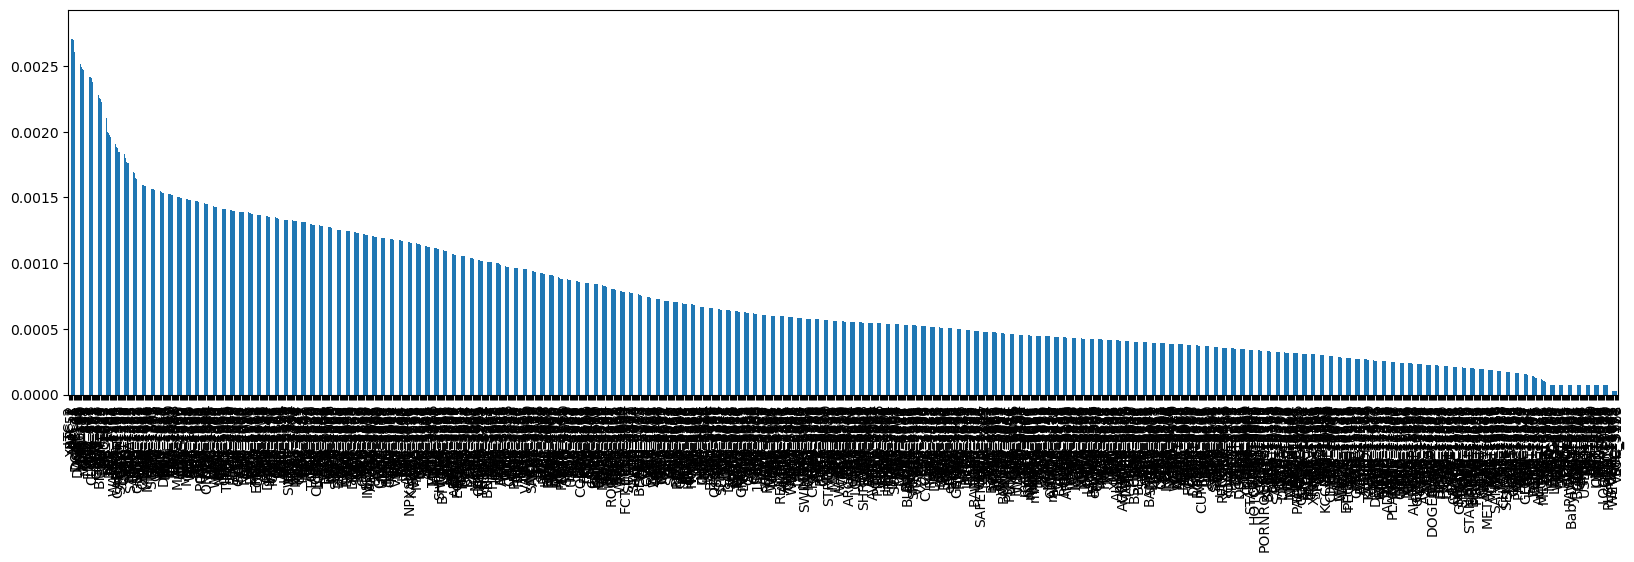

In [12]:
# check for digital currency distribution:
df['uid'].value_counts(normalize= True).plot(kind='bar', figsize=(20,5));

In [20]:
# df['date'] = df['time_high'].str.slice(0,10)
# df['date'] = pd.to_datetime(df['date'])

In [66]:
# df.info()
# df_vual = df[['date', 'quote.USD.high', 'quote.USD.low']].reset_index()
# df_vual = df_vual[['symbol_id','date', 'quote.USD.high', 'quote.USD.low']]
# print('There are {} unique digital currencies in the dataset'.format(len(df_vual['symbol_id'].unique())))

There are 1375 unique digital currencies in the dataset


In [62]:
# df_vual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243591 entries, 0 to 1243590
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   symbol_id       1243591 non-null  object        
 1   date            1243071 non-null  datetime64[ns]
 2   quote.USD.high  1243591 non-null  float64       
 3   quote.USD.low   1243591 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 38.0+ MB


In [72]:
# df_vual['quote_mean'] = (df_vual['quote.USD.high'] + df_vual['quote.USD.low'])/2
# df_vual['month'] = df_vual['date'].astype(str).str.slice(5,7)
# df_vual['year'] = df_vual['date'].astype(str).str.slice(0,4)
# df_vual['year_month'] = df_vual['year'].astype(str) + '-' + df_vual['month'].astype(str)

## Feature Engineering:

In [21]:
df_t = df.copy()
df_t.head()

time_open  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:00.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:00.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:00.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:00:00.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:00:00.000Z   

                                                   time_high  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:07.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:07.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:06.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:56:05.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:57:05.000Z   

                                                    time_low  quote.USD.open  \
symbol_id time_close                                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:37:05.000Z       90.554933   
          2020-11-24T00:59:59.999Z  2020-11-24T00:40:06.000Z       85.161030   
          2020-11-25T00:59:59.999Z  2020-11-25T00:58:05.000Z       57.527366   
          2020-11-26T00:59:59.999Z  2020-11-26T00:13:06.000Z       39.466839   
          2020-11-27T00:59:59.999Z  2020-11-27T00:16:05.000Z       30.002092   

                                    quote.USD.high  quote.USD.low  \
symbol_id time_close                                                
MPH_7742  2020-11-23T00:59:59.999Z       90.554933      79.852330   
          2020-11-24T00:59:59.999Z       85.161030      80.694133   
          2020-11-25T00:59:59.999Z       57.527366      53.679986   
          2020-11-26T00:59:59.999Z       40.121814      38.980499   
          2020-11-27T00:59:59.999Z       30.391962      29.690305   

                                    quote.USD.close  quote.USD.volume  \
symbol_id time_close                                                    
MPH_7742  2020-11-23T00:59:59.999Z        85.599205      1.600851e+07   
          2020-11-24T00:59:59.999Z        81.645754      1.009738e+07   
          2020-11-25T00:59:59.999Z        53.704963      8.899399e+06   
          2020-11-26T00:59:59.999Z        40.056399      4.225065e+06   
          2020-11-27T00:59:59.999Z        30.383005      2.933446e+06   

                                    quote.USD.market_cap  \
symbol_id time_close                                       
MPH_7742  2020-11-23T00:59:59.999Z                   0.0   
          2020-11-24T00:59:59.999Z                   0.0   
          2020-11-25T00:59:59.999Z                   0.0   
          2020-11-26T00:59:59.999Z                   0.0   
          2020-11-27T00:59:59.999Z                   0.0   

                                         quote.USD.timestamp symbol    id  \
symbol_id time_close                                                        
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:59:59.999Z    MPH  7742   
          2020-11-24T00:59:59.999Z  2020-11-24T00:59:59.999Z    MPH  7742   
          2020-11-25T00:59:59.999Z  2020-11-25T00:59:59.999Z    MPH  7742   
          2020-11-26T00:59:59.999Z  2020-11-26T00:59:59.999Z    MPH  7742   
          2020-11-27T00:59:59.999Z  2020-11-27T00:59:59.999Z    MPH  7742   

                                         uid  
symbol_id time_close                          
MPH_7742  2020-11-23T00:59:59.999Z  MPH_7742  
          2020-11-24T00:59:59.999Z  MPH_7742  
          2020-11-25T00:59:59.999Z  MPH_7742  
          2020-11-26T00:59:59.999Z  MPH_7742  
          2020-11-27T00:59:59.999Z  MPH_7742

In [33]:
# Find categorical columns and numeric columns
df_t.columns.to_series().groupby(df_t.dtypes).groups

{int64: ['id'], float64: ['quote.USD.open', 'quote.USD.high', 'quote.USD.low', 'quote.USD.close', 'quote.USD.volume', 'quote.USD.market_cap'], object: ['time_open', 'time_high', 'time_low', 'quote.USD.timestamp', 'symbol', 'uid']}

In [39]:
# Before using KNN, we need to standardize the data:
features = ['quote.USD.open',
       'quote.USD.high', 'quote.USD.low', 'quote.USD.close',
       'quote.USD.volume', 'quote.USD.market_cap']
df_t = df_t[features]
scaler = StandardScaler()
scaler.fit(df_t)
print(scaler.mean_)
df_n = scaler.transform(df_t)
df_n = pd.DataFrame(df_n, columns = features)
df_n.head()

[2.59362676e+02 2.61223981e+02 2.57357434e+02 2.59305516e+02
 1.21227236e+10 1.23850265e+09]


,quote.USD.open,quote.USD.high,quote.USD.low,quote.USD.close,quote.USD.volume,quote.USD.market_cap
0,-0.051759,-0.051956,-0.054870,-0.053279,-0.002106,-0.05942
1,-0.053413,-0.053598,-0.054610,-0.054491,-0.002107,-0.05942
2,-0.061886,-0.062011,-0.062961,-0.063061,-0.002107,-0.05942
3,-0.067423,-0.067309,-0.067504,-0.067248,-0.002108,-0.05942
4,-0.070325,-0.070271,-0.070376,-0.070215,-0.002108,-0.05942


In [53]:
df_final = pd.concat([df.reset_index().drop(['quote.USD.open',
       'quote.USD.high', 'quote.USD.low', 'quote.USD.close',
       'quote.USD.volume', 'quote.USD.market_cap'], axis =1),df_n], axis = 1)
df_final.head()

,symbol_id,time_close,time_open,time_high,time_low,quote.USD.timestamp,symbol,id,uid,quote.USD.open,quote.USD.high,quote.USD.low,quote.USD.close,quote.USD.volume,quote.USD.market_cap
0,MPH_7742,2020-11-23T00:59:59.999Z,2020-11-23T00:00:00.000Z,2020-11-23T00:00:07.000Z,2020-11-23T00:37:05.000Z,2020-11-23T00:59:59.999Z,MPH,7742,MPH_7742,-0.051759,-0.051956,-0.054870,-0.053279,-0.002106,-0.05942
1,MPH_7742,2020-11-24T00:59:59.999Z,2020-11-24T00:00:00.000Z,2020-11-24T00:00:07.000Z,2020-11-24T00:40:06.000Z,2020-11-24T00:59:59.999Z,MPH,7742,MPH_7742,-0.053413,-0.053598,-0.054610,-0.054491,-0.002107,-0.05942
2,MPH_7742,2020-11-25T00:59:59.999Z,2020-11-25T00:00:00.000Z,2020-11-25T00:00:06.000Z,2020-11-25T00:58:05.000Z,2020-11-25T00:59:59.999Z,MPH,7742,MPH_7742,-0.061886,-0.062011,-0.062961,-0.063061,-0.002107,-0.05942
3,MPH_7742,2020-11-26T00:59:59.999Z,2020-11-26T00:00:00.000Z,2020-11-26T00:56:05.000Z,2020-11-26T00:13:06.000Z,2020-11-26T00:59:59.999Z,MPH,7742,MPH_7742,-0.067423,-0.067309,-0.067504,-0.067248,-0.002108,-0.05942
4,MPH_7742,2020-11-27T00:59:59.999Z,2020-11-27T00:00:00.000Z,2020-11-27T00:57:05.000Z,2020-11-27T00:16:05.000Z,2020-11-27T00:59:59.999Z,MPH,7742,MPH_7742,-0.070325,-0.070271,-0.070376,-0.070215,-0.002108,-0.05942


In [ ]:
# Reset index
df_final = df_final.set_index(['symbol_id', 'time_close'])

In [63]:
# drop id and sumbol columns, since we have an unique id: 'uid' already.
df_final = df_final.drop(['id','symbol'], axis = 1)

In [64]:
# Take a peep:
df_final

time_open  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:00.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:00.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:00.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:00:00.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:00:00.000Z   
...                                                      ...   
CXO_2490  2022-07-01T00:59:59.999Z  2022-07-01T00:00:00.000Z   
          2022-07-02T00:59:59.999Z  2022-07-02T00:00:00.000Z   
          2022-07-03T00:59:59.999Z  2022-07-03T00:00:00.000Z   
          2022-07-04T00:59:59.999Z  2022-07-04T00:00:00.000Z   
          2022-07-05T00:59:59.999Z  2022-07-05T00:00:00.000Z   

                                                   time_high  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:07.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:07.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:06.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:56:05.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:57:05.000Z   
...                                                      ...   
CXO_2490  2022-07-01T00:59:59.999Z  2022-07-01T00:34:00.000Z   
          2022-07-02T00:59:59.999Z  2022-07-02T00:20:00.000Z   
          2022-07-03T00:59:59.999Z  2022-07-03T00:17:00.000Z   
          2022-07-04T00:59:59.999Z  2022-07-04T00:16:00.000Z   
          2022-07-05T00:59:59.999Z  2022-07-05T00:55:00.000Z   

                                                    time_low  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:37:05.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:40:06.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:58:05.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:13:06.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:16:05.000Z   
...                                                      ...   
CXO_2490  2022-07-01T00:59:59.999Z  2022-07-01T00:07:00.000Z   
          2022-07-02T00:59:59.999Z  2022-07-02T00:59:00.000Z   
          2022-07-03T00:59:59.999Z  2022-07-03T00:35:00.000Z   
          2022-07-04T00:59:59.999Z  2022-07-04T00:07:00.000Z   
          2022-07-05T00:59:59.999Z  2022-07-05T00:07:00.000Z   

                                         quote.USD.timestamp       uid  \
symbol_id time_close                                                     
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:59:59.999Z  MPH_7742   
          2020-11-24T00:59:59.999Z  2020-11-24T00:59:59.999Z  MPH_7742   
          2020-11-25T00:59:59.999Z  2020-11-25T00:59:59.999Z  MPH_7742   
          2020-11-26T00:59:59.999Z  2020-11-26T00:59:59.999Z  MPH_7742   
          2020-11-27T00:59:59.999Z  2020-11-27T00:59:59.999Z  MPH_7742   
...                                                      ...       ...   
CXO_2490  2022-07-01T00:59:59.999Z  2022-07-01T00:59:59.999Z  CXO_2490   
          2022-07-02T00:59:59.999Z  2022-07-02T00:59:59.999Z  CXO_2490   
          2022-07-03T00:59:59.999Z  2022-07-03T00:59:59.999Z  CXO_2490   
          2022-07-04T00:59:59.999Z  2022-07-04T00:59:59.999Z  CXO_2490   
          2022-07-05T00:59:59.999Z  2022-07-05T00:59:59.999Z  CXO_2490   

                                    quote.USD.open  quote.USD.high  \
symbol_id time_close                                                 
MPH_7742  2020-11-23T00:59:59.999Z       -0.051759       -0.051956   
          2020-11-24T00:59:59.999Z       -0.053413       -0.053598   
          2020-11-25T00:59:59.999Z       -0.061886       -0.062011   
          2020-11-26T00:59:59.999Z       -0.067423       -0.067309   
          2020-11-27T00:59:59.999Z       -0.070325       -0.070271   
...                                            ...             ...   
CXO_2490  2022-07-01T00:59:59

In [68]:
# Inspect column time_open and quote.USD.timestamp
# df_final['time_open'].unique()
# df_final['quote.USD.timestamp'].unique()

# Drop time_open and quote.USD.timestamp columns:
df_final = df_final.drop(['time_open', 'quote.USD.timestamp'], axis = 1)



In [73]:
# for time_high and time_low, we extract the minute and second as new features:
df_final['minute_high'] = [t.minute for t in pd.DatetimeIndex(df.time_high)]
df_final['minute_low'] = [t.minute for t in pd.DatetimeIndex(df.time_low)]
df_final['sec_high'] = [t.second for t in pd.DatetimeIndex(df.time_high)]
df_final['sec_low'] = [t.second for t in pd.DatetimeIndex(df.time_low)]


In [76]:
# Take a peep:
# df_final.head()

# Drop column time_hign, time_low
df_final = df_final.drop(['time_high', 'time_low'], axis = 1)

In [79]:
# Standardize new columns:
new_feature = ['minute_high', 'minute_low', 'sec_high', 'sec_low']
df_newcat = df_final[new_feature]
df_newcat = scaler.fit_transform(df_newcat)
df_newcat = pd.DataFrame(df_newcat, columns=new_feature)

In [83]:
# Concatenate together:
df_final_copy = df_final.copy()
df_final_copy = pd.concat([df_final_copy.reset_index().drop(new_feature, axis = 1), df_newcat], axis = 1)
df_final_copy = df_final_copy.set_index(['symbol_id', 'time_close'])

In [89]:
# drop uid
# df_final_copy = df_final_copy.drop('uid', axis = 1)
# drop NA
df_final_copy = df_final_copy.dropna(axis = 0)

In [90]:
df_final_copy 

quote.USD.open  quote.USD.high  \
symbol_id time_close                                                 
MPH_7742  2020-11-23T00:59:59.999Z       -0.051759       -0.051956   
          2020-11-24T00:59:59.999Z       -0.053413       -0.053598   
          2020-11-25T00:59:59.999Z       -0.061886       -0.062011   
          2020-11-26T00:59:59.999Z       -0.067423       -0.067309   
          2020-11-27T00:59:59.999Z       -0.070325       -0.070271   
...                                            ...             ...   
CXO_2490  2022-07-01T00:59:59.999Z       -0.079504       -0.079503   
          2022-07-02T00:59:59.999Z       -0.079505       -0.079504   
          2022-07-03T00:59:59.999Z       -0.079505       -0.079504   
          2022-07-04T00:59:59.999Z       -0.079505       -0.079504   
          2022-07-05T00:59:59.999Z       -0.079503       -0.079503   

                                    quote.USD.low  quote.USD.close  \
symbol_id time_close                                                 
MPH_7742  2020-11-23T00:59:59.999Z      -0.054870        -0.053279   
          2020-11-24T00:59:59.999Z      -0.054610        -0.054491   
          2020-11-25T00:59:59.999Z      -0.062961        -0.063061   
          2020-11-26T00:59:59.999Z      -0.067504        -0.067248   
          2020-11-27T00:59:59.999Z      -0.070376        -0.070215   
...                                           ...              ...   
CXO_2490  2022-07-01T00:59:59.999Z      -0.079534        -0.079513   
          2022-07-02T00:59:59.999Z      -0.079534        -0.079514   
          2022-07-03T00:59:59.999Z      -0.079534        -0.079514   
          2022-07-04T00:59:59.999Z      -0.079534        -0.079514   
          2022-07-05T00:59:59.999Z      -0.079533        -0.079513   

                                    quote.USD.volume  quote.USD.market_cap  \
symbol_id time_close                                                         
MPH_7742  2020-11-23T00:59:59.999Z         -0.002106             -0.059420   
          2020-11-24T00:59:59.999Z         -0.002107             -0.059420   
          2020-11-25T00:59:59.999Z         -0.002107             -0.059420   
          2020-11-26T00:59:59.999Z         -0.002108             -0.059420   
          2020-11-27T00:59:59.999Z         -0.002108             -0.059420   
...                                              ...                   ...   
CXO_2490  2022-07-01T00:59:59.999Z         -0.002108             -0.058753   
          2022-07-02T00:59:59.999Z         -0.002108             -0.058784   
          2022-07-03T00:59:59.999Z         -0.002108             -0.058783   
          2022-07-04T00:59:59.999Z         -0.002108             -0.058780   
          2022-07-05T00:59:59.999Z         -0.002108             -0.058738   

                                    minute_high  minute_low  sec_high  \
symbol_id time_close                                                    
MPH_7742  2020-11-23T00:59:59.999Z    -1.308405    0.420403 -0.056313   
          2020-11-24T00:59:59.999Z    -1.308405    0.564676 -0.056313   
          2020-11-25T00:59:59.999Z    -1.308405    1.430313 -0.167048   
          2020-11-26T00:59:59.999Z     1.395706   -0.733778 -0.277782   
          2020-11-27T00:59:59.999Z     1.443994   -0.589506 -0.277782   
...                                         ...         ...       ...   
CXO_2490  2022-07-01T00:59:59.999Z     0.333377   -1.022324 -0.831453   
          2022-07-02T00:59:59.999Z    -0.342651    1.478404 -0.831453   
          2022-07-03T00:59:59.999Z    -0.487514    0.324222 -0.831453   
          2022-07-04T00:59:59.999Z    -0.535802   -1.022324 -0.831453   
          2022-07-05T00:59:59.999Z     1.347418   -1.022324 -0.831453   

                                     sec_low  
symbol_id time_close                          
MPH_7742  2020-11-23T00:59:59.999Z -0.297594  
          2020-11-24T00:59:59.999Z -0.188209  
          2020-11-25T00:59:59.999Z -0.297594  
          2020

## Modeling
### The first model we tried is K-menas:


In [95]:
# K-means:
# Using Albow rule to determine K:

kmeans_per_k = [KMeans(random_state=8888, n_clusters= k).fit(df_final_copy) for k in range(1,20)]
inertias = [model.inertia_ for model in kmeans_per_k]

Saving figure inertia_vs_k_plot


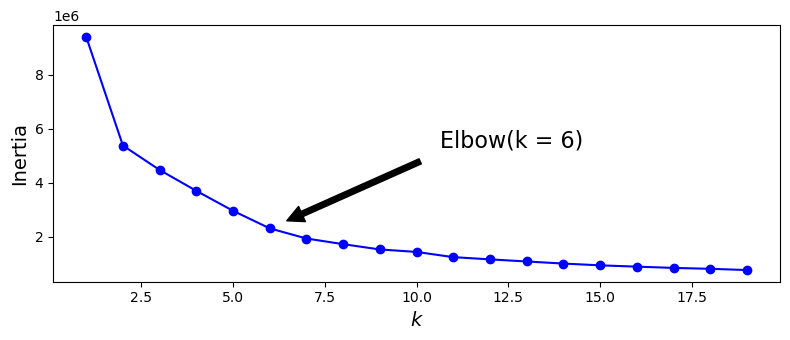

In [107]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow(k = 6)',
             xy=(6, inertias[5]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
# plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()